## 주파수 영역에서 Low-Pass filter의 한 종류인 Gaussian filter를 구현하시오.

1. 가우시안 필터 식에서의 σ을 3, 5, 7, 9, 11로 변화시키면서 주파수영역에서 확인하시오.
2. 서로 다른 σ에 대한 필터 파일명을 각각 G3, G5, G7, G9, G11 로 하시오. 
3. 이미지 파일(이미지는 본인이 고를 것) x의 푸리에 변환 결과 X를 나타내시오. 
4. X 와 G3, G5, G7, G9, G11 과 각각곱한 후 그 결과를 확인하시오. 결과의 이름은 각각 Y3, Y5, Y7, y9, Y11 이라 한다 
5. G3, G5, GT, G9, G11 의 역푸리에 변환 결과를 각각 g3, g5, g7, g9 g11 파일 명으로 저장하시오 
6. x와 g3, g5, g7, g9, g11 사이의 컨볼루션 결과를 구현하여 나타내고 이름은 각각y3, y5, y7, y9, yll로 하시오 
7. Opency에서 제공하는 가우시안필터에서 0을 3, 5, 7, 9, 11 변환시키면서 X와 필터링한 결과를 각각 w3, w5, w7, w9, w11로 저장하시오. 
8. (5)에서 구한 결과와 (6)에서 구한 결과를 비교한 후 분석 결과를 설명하시오.

In [2]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy.fft as fp
import numpy as np
import cv2
from scipy import ndimage, misc, signal
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

def sifnaltonose(a, axis=0, ddof=0):
  a = np.asanyarray(a)
  m = a.mean(axis)
  sd = a.sttd(axis=axis, ddof=ddof)
  return np.where(sd == 0, 0, m/sd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#영상 불러오기
img = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/asg4/IMG_5884.jpeg', 0)
#영상에 fft를 적용하여 수행
freq = fp.fft2(img)
#가우시안 필터를 생성
gauss_kernel = np.outer(signal.gaussian(img.shape[0], 5), signal.gaussian(img.shape[1], 5))
assert(freq.shape == gauss_kernel.shape)
#가우시간 필터에 대한 fft수행
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
#주파수 영역에서의 필터링은 곱셈이므로 영상의 fft결과와 가우시안 필터의 fft 결과 단순 곱 수행
convolved = freq * freq_kernel
img1 = fp.ifft2(convolved).real
mag1 = 20 * np.log10(0.1 + fp.fftshift(freq))
mag2 = 20 * np.log10(0.1 + fp.fftshift(freq_kernel))
mag3 = 20 * np.log10(0.1 + fp.fftshift(convolved))

<ipython-input-4-401cc7c7da5e>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 4), pylab.imshow(mag1.astype(int))
<ipython-input-4-401cc7c7da5e>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 5), pylab. imshow(mag2.astype(int))
<ipython-input-4-401cc7c7da5e>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 6), pylab.imshow(mag3.astype(int))


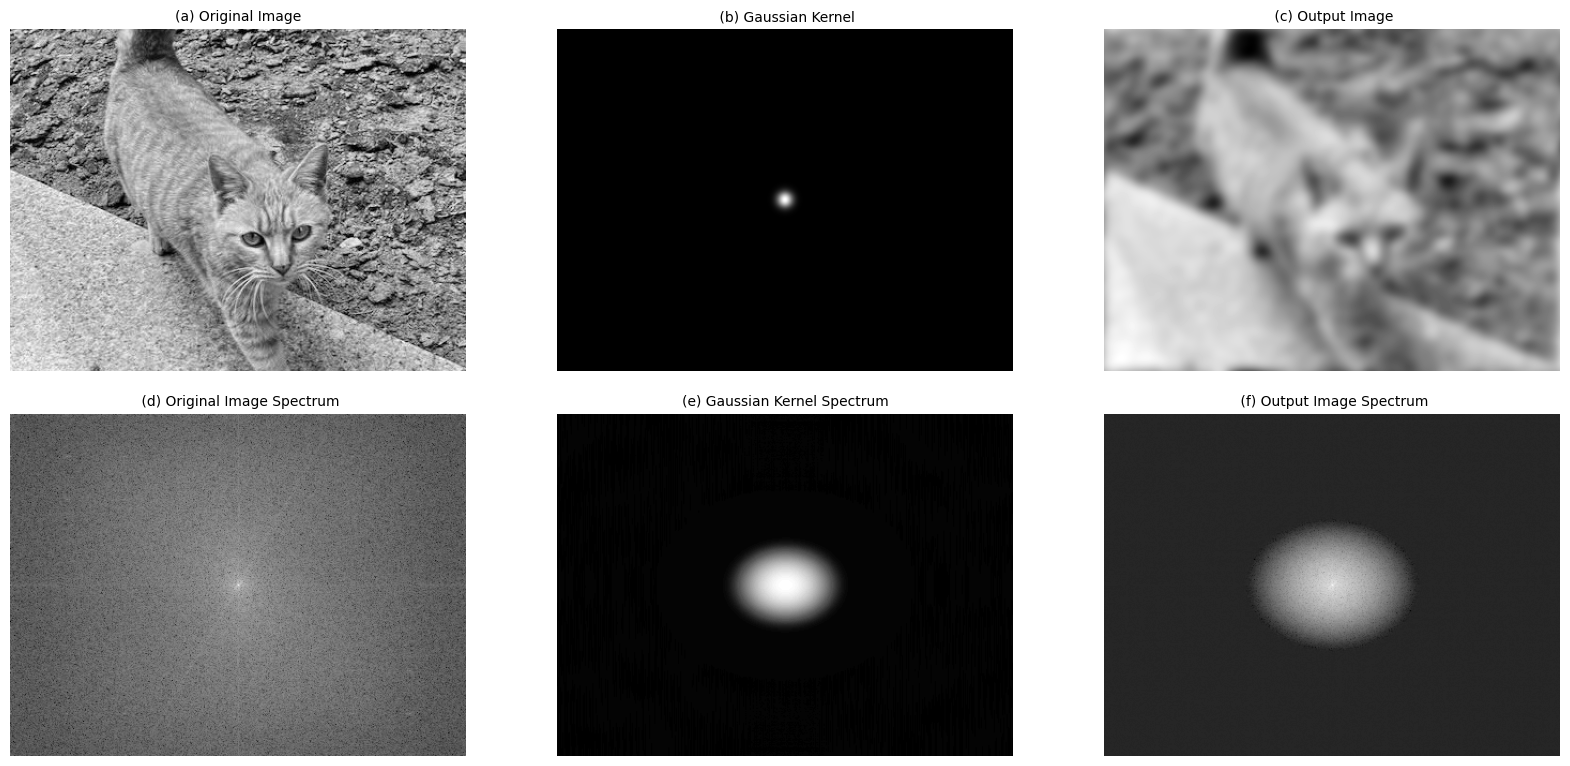

In [4]:
pylab.figure(figsize=(20, 10)),pylab.gray()
# 하나의 출력창에 모두 보여주려면 아래와 같이 subplot 함수를 사용
pylab.subplot (2, 3, 1), pylab.imshow(img)
pylab.title('(a) Original Image', size=10), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow (gauss_kernel)
pylab. title(' (b) Gaussian Kernel', size=10), pylab.axis('off')
pylab.subplot (2, 3, 3), pylab. imshow(img1)
pylab.title(' (c) Output Image', size=10), pylab.axis('off')
pylab.subplot (2, 3, 4), pylab.imshow(mag1.astype(int))
pylab. title(' (d) Original Image Spectrum', size=10), pylab.axis('off')
pylab.subplot (2, 3, 5), pylab. imshow(mag2.astype(int))
pylab.title('(e) Gaussian Kernel Spectrum', size=10), pylab.axis('off')
pylab.subplot (2, 3, 6), pylab.imshow(mag3.astype(int))
pylab.title(' (f) Output Image Spectrum', size=10), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

In [5]:
gauss_kernel3 = np.outer(signal.gaussian(img.shape[0], 3), signal.gaussian(img.shape[1], 3))
freq_kernel3 = fp.fft2(fp.ifftshift(gauss_kernel3))
convolved3 = freq * freq_kernel3
image3 = 20 * np.log10(0.1 + fp.fftshift(convolved3))

gauss_kernel5 = np.outer(signal.gaussian(img.shape[0], 5), signal.gaussian(img.shape[1], 5))
freq_kernel5 = fp.fft2(fp.ifftshift(gauss_kernel5))
convolved5 = freq * freq_kernel5
image5 = 20 * np.log10(0.1 + fp.fftshift(convolved5))

gauss_kernel7 = np.outer(signal.gaussian(img.shape[0], 7), signal.gaussian(img.shape[1], 7))
freq_kernel7 = fp.fft2(fp.ifftshift(gauss_kernel7))
convolved7 = freq * freq_kernel7
image7 = 20 * np.log10(0.1 + fp.fftshift(convolved7))

gauss_kernel9 = np.outer(signal.gaussian(img.shape[0], 9), signal.gaussian(img.shape[1], 9))
freq_kernel9 = fp.fft2(fp.ifftshift(gauss_kernel9))
convolved9 = freq * freq_kernel9
image9 = 20 * np.log10(0.1 + fp.fftshift(convolved9))

gauss_kernel11 = np.outer(signal.gaussian(img.shape[0], 11), signal.gaussian(img.shape[1], 11))
freq_kernel11 = fp.fft2(fp.ifftshift(gauss_kernel11))
convolved11 = freq * freq_kernel11
image11 = 20 * np.log10(0.1 + fp.fftshift(convolved11))

<ipython-input-6-e12b7faddf86>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.plot(),pylab.imshow(image11.astype(int)), pylab.axis('off')


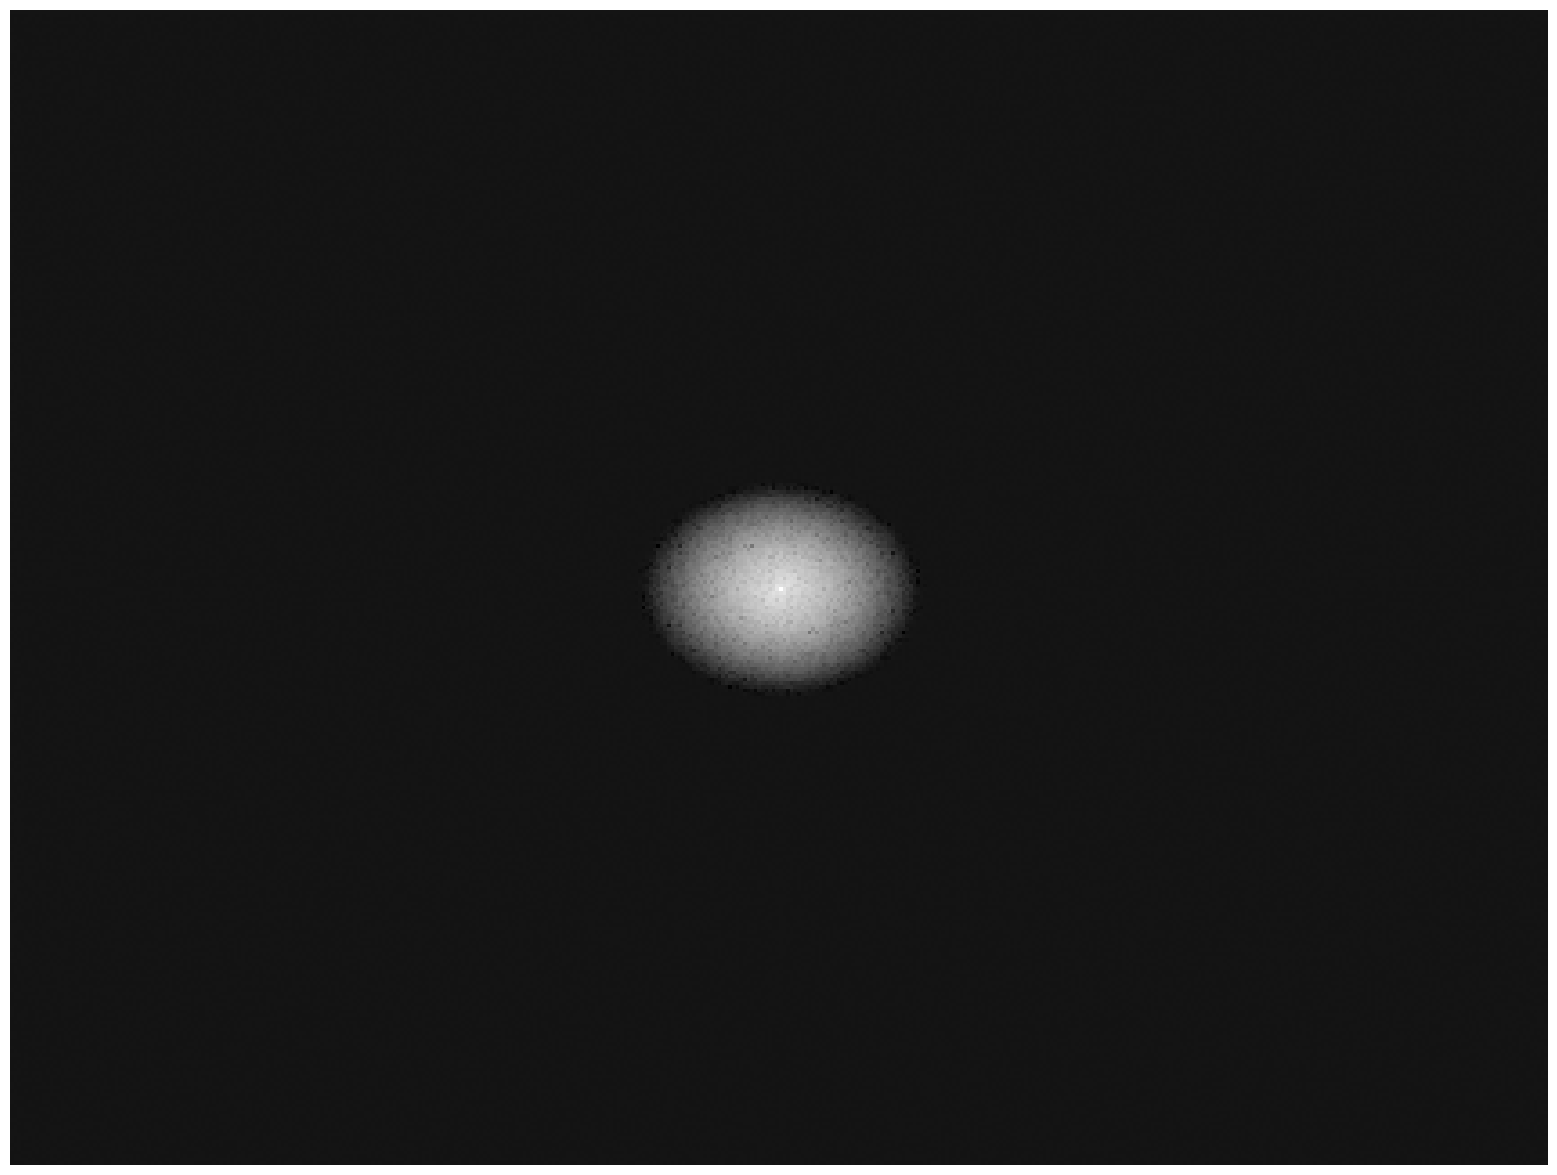

In [6]:
pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(image11.astype(int)), pylab.axis('off')
pylab.show()

<ipython-input-81-afb10d0a1ae1>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 1), pylab.imshow(image3.astype(int))
<ipython-input-81-afb10d0a1ae1>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 2), pylab.imshow (image5.astype(int))
<ipython-input-81-afb10d0a1ae1>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 3), pylab. imshow(image7.astype(int))
<ipython-input-81-afb10d0a1ae1>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 4), pylab.imshow(image9.astype(int))
<ipython-input-81-afb10d0a1ae1>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot (2, 3, 5), pylab. imshow(image11.astype(int))


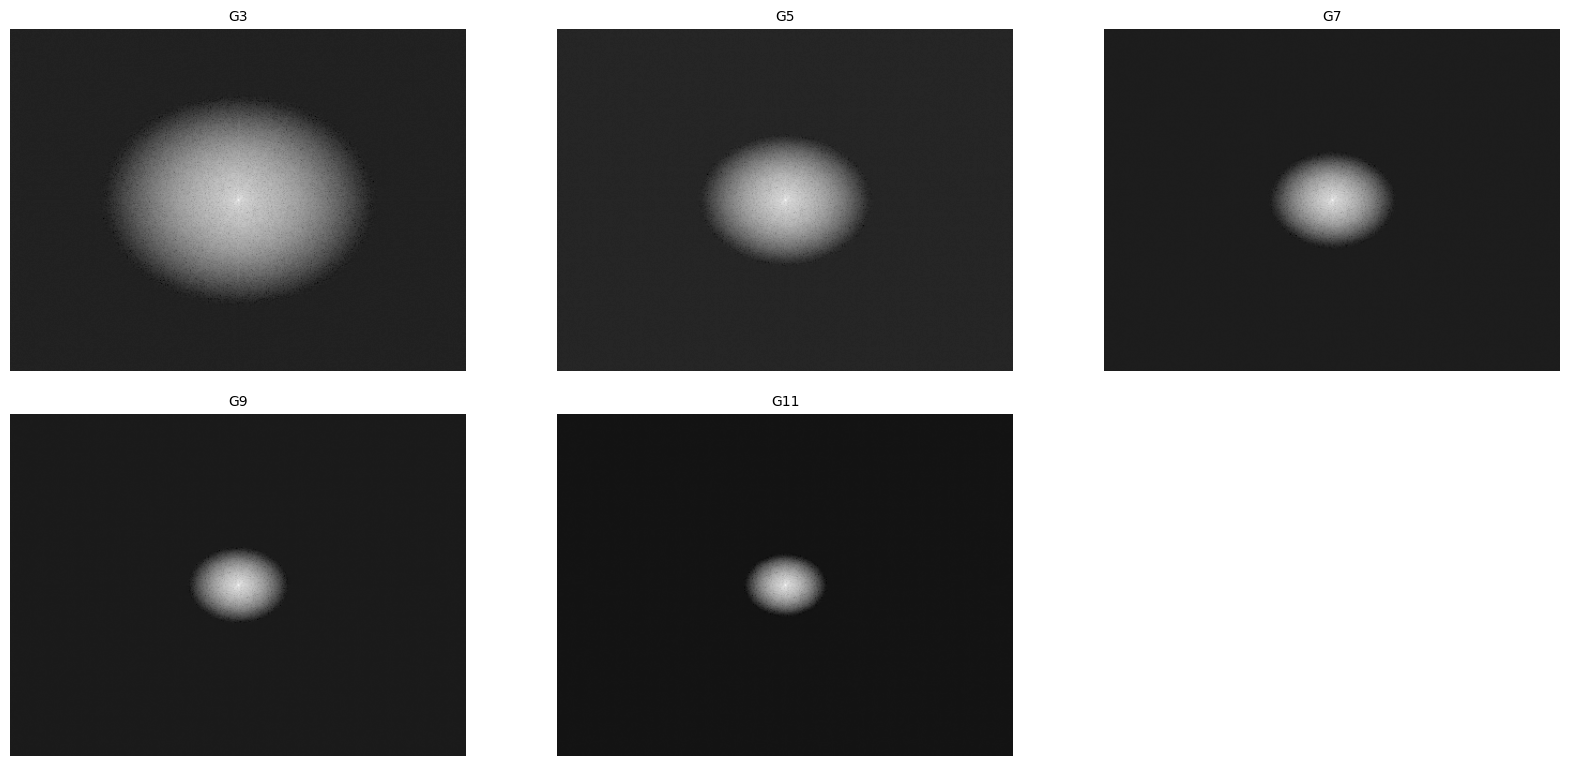

In [81]:
#G
pylab.figure(figsize=(20, 10)),pylab.gray()
pylab.subplot (2, 3, 1), pylab.imshow(image3.astype(int))
pylab.title('G3', size=10), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow (image5.astype(int))
pylab.title('G5', size=10), pylab.axis('off')
pylab.subplot (2, 3, 3), pylab. imshow(image7.astype(int))
pylab.title('G7', size=10), pylab.axis('off')
pylab.subplot (2, 3, 4), pylab.imshow(image9.astype(int))
pylab.title('G9', size=10), pylab.axis('off')
pylab.subplot (2, 3, 5), pylab. imshow(image11.astype(int))
pylab.title('G11', size=10), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

<ipython-input-85-15a601c700ce>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_image = fft_image.astype(float)


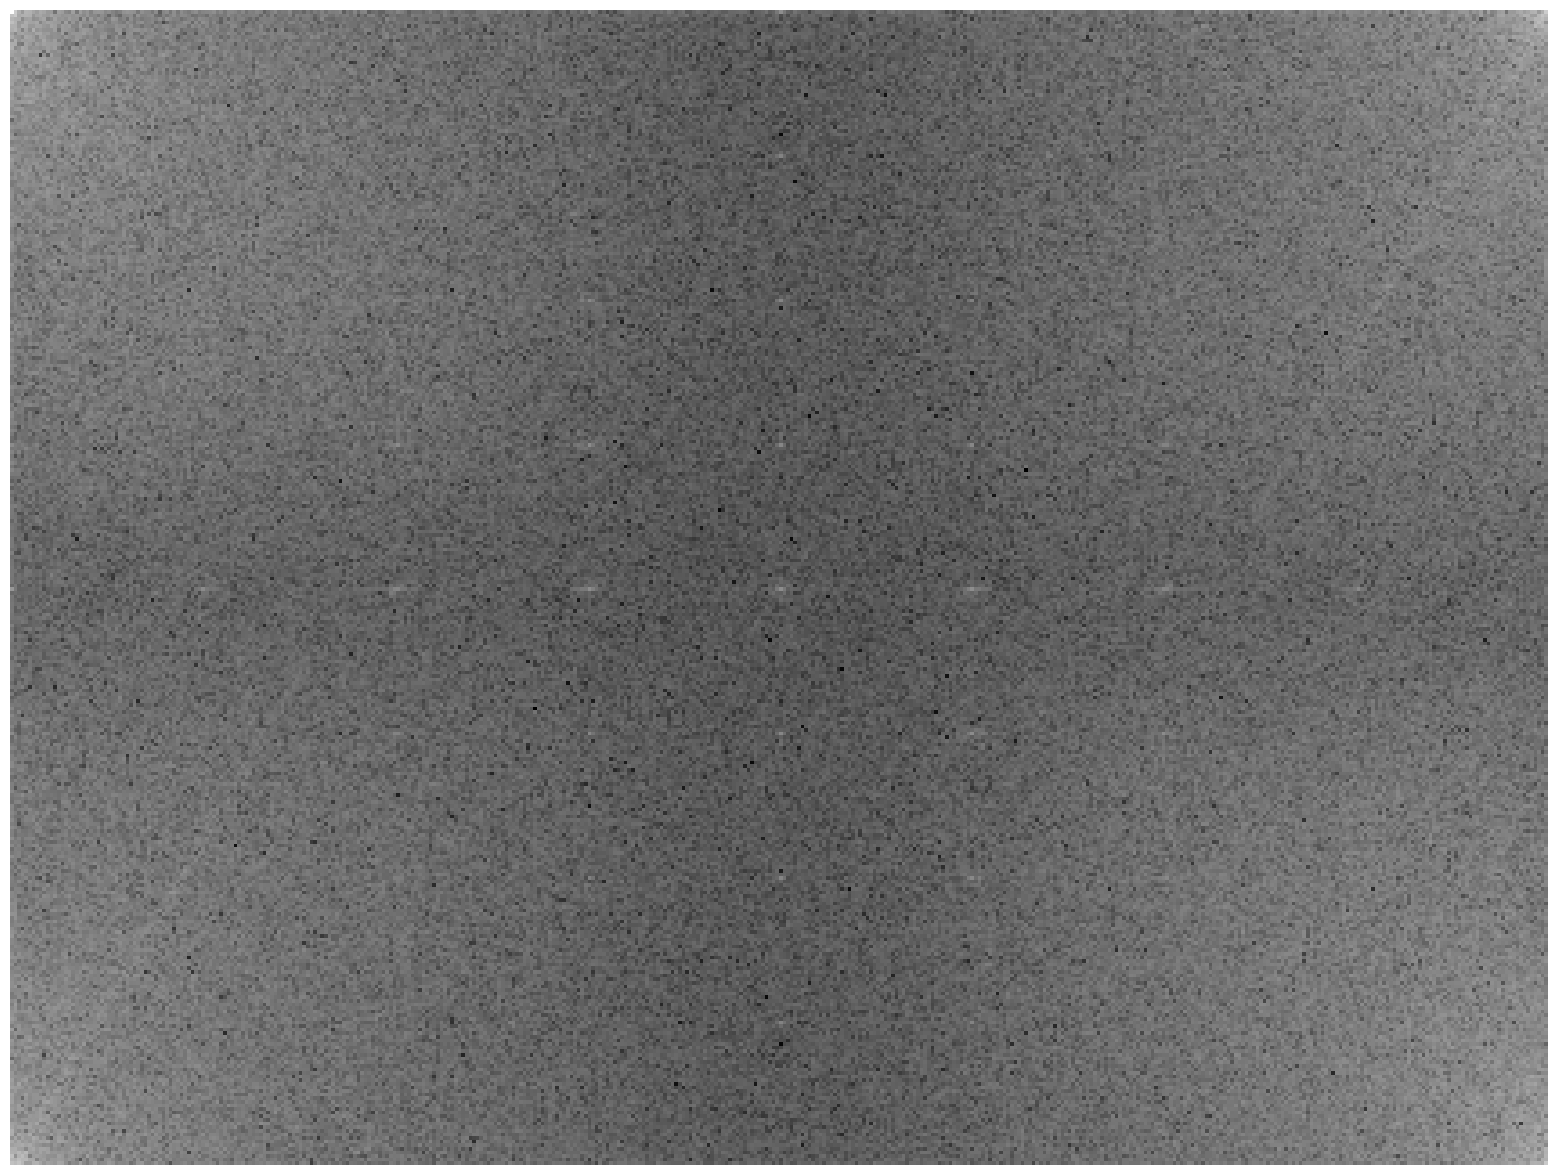

In [85]:
#영상을 이산푸리에 변환
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

fft_image = np.fft.fftshift(np.fft.fft2(img))
fft_image = fft_image.astype(float)

#DFT 변환
dft_shift = np.fft.fftshift(dft)
mag_dft = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]))
mag_dft_shift = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft[:, :, 1]))

pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(mag_dft), pylab.axis('off')
pylab.show()

<ipython-input-84-f8f2dca111f4>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
<ipython-input-84-f8f2dca111f4>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))


(Text(0.5, 1.0, 'X'), (-0.5, 425.5, 319.5, -0.5))

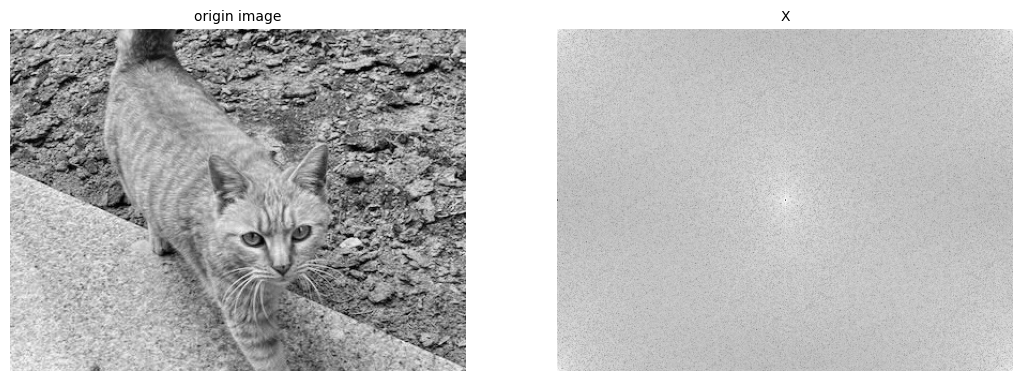

In [84]:
pylab.figure(figsize=(20, 10)),pylab.gray()

Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
pylab.subplot (2, 3, 1), pylab.imshow(img)
pylab.title('origin image', size=10), pylab.axis('off')

Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
pylab.subplot (2, 3, 2), pylab.imshow(mag_dft_shift)
pylab.title('X', size=10), pylab.axis('off')


In [9]:
# X와 G들을 곱해서 Y들를 출력

<ipython-input-55-dc5a64dac941>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
<ipython-input-55-dc5a64dac941>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
<ipython-input-55-dc5a64dac941>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
<ipython-input-55-dc5a64dac941>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
<ipython-input-55-dc5a64dac941>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))


(Text(0.5, 1.0, 'Y11'), (-0.5, 425.5, 319.5, -0.5))

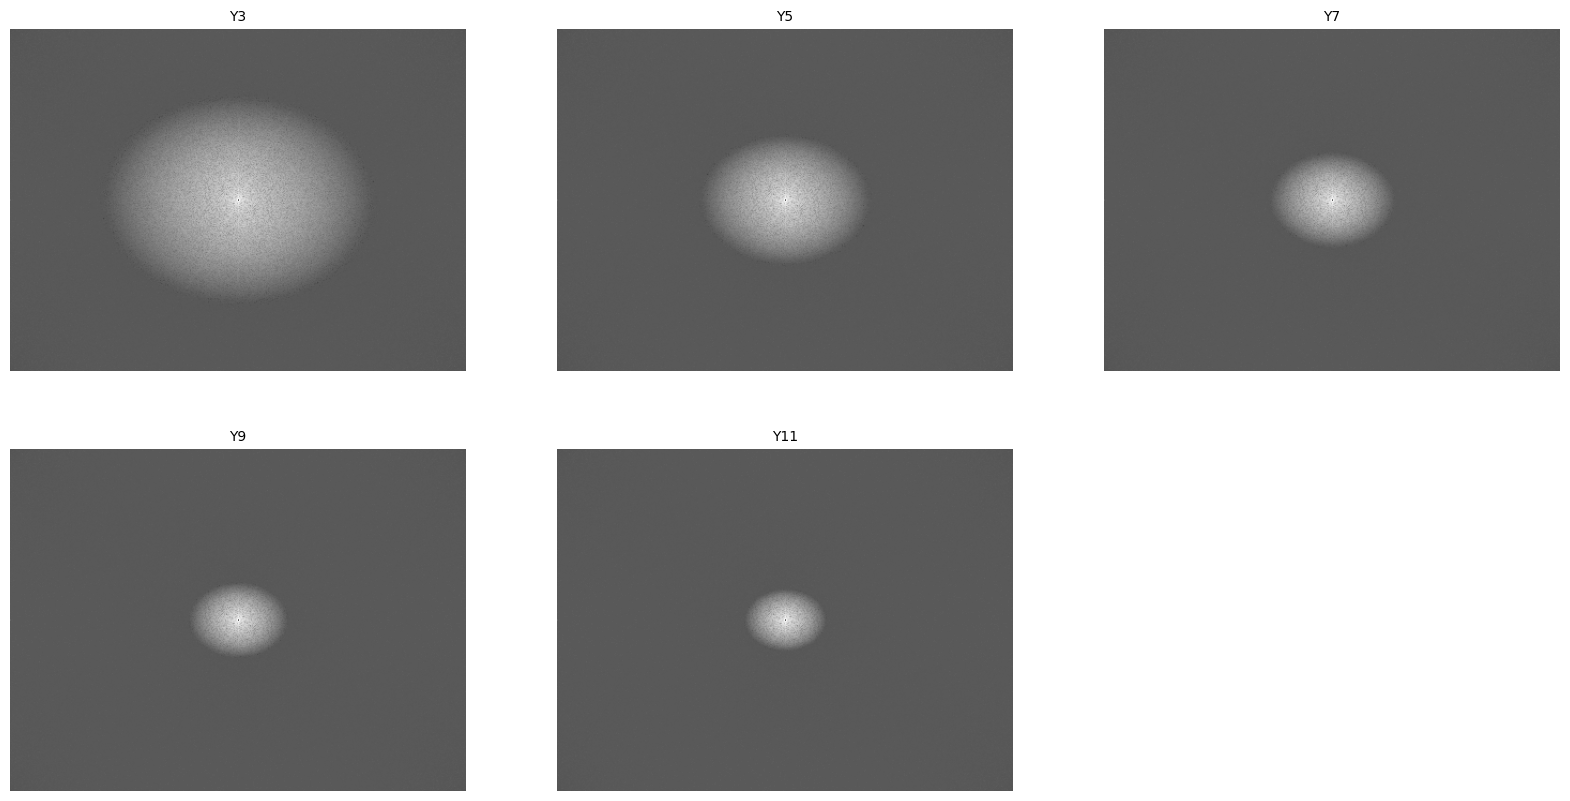

In [55]:
pylab.figure(figsize=(20, 10)),pylab.gray()

Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
pylab.subplot (2, 3, 1), pylab.imshow(Y3)
pylab.title('Y3', size=10), pylab.axis('off')

Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
pylab.subplot (2, 3, 2), pylab.imshow(Y5)
pylab.title('Y5', size=10), pylab.axis('off')

Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
pylab.subplot (2, 3, 3), pylab.imshow(Y7)
pylab.title('Y7', size=10), pylab.axis('off')

Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
pylab.subplot (2, 3, 4), pylab.imshow(Y9)
pylab.title('Y9', size=10), pylab.axis('off')

Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))
pylab.subplot (2, 3, 5), pylab.imshow(Y11)
pylab.title('Y11', size=10), pylab.axis('off')

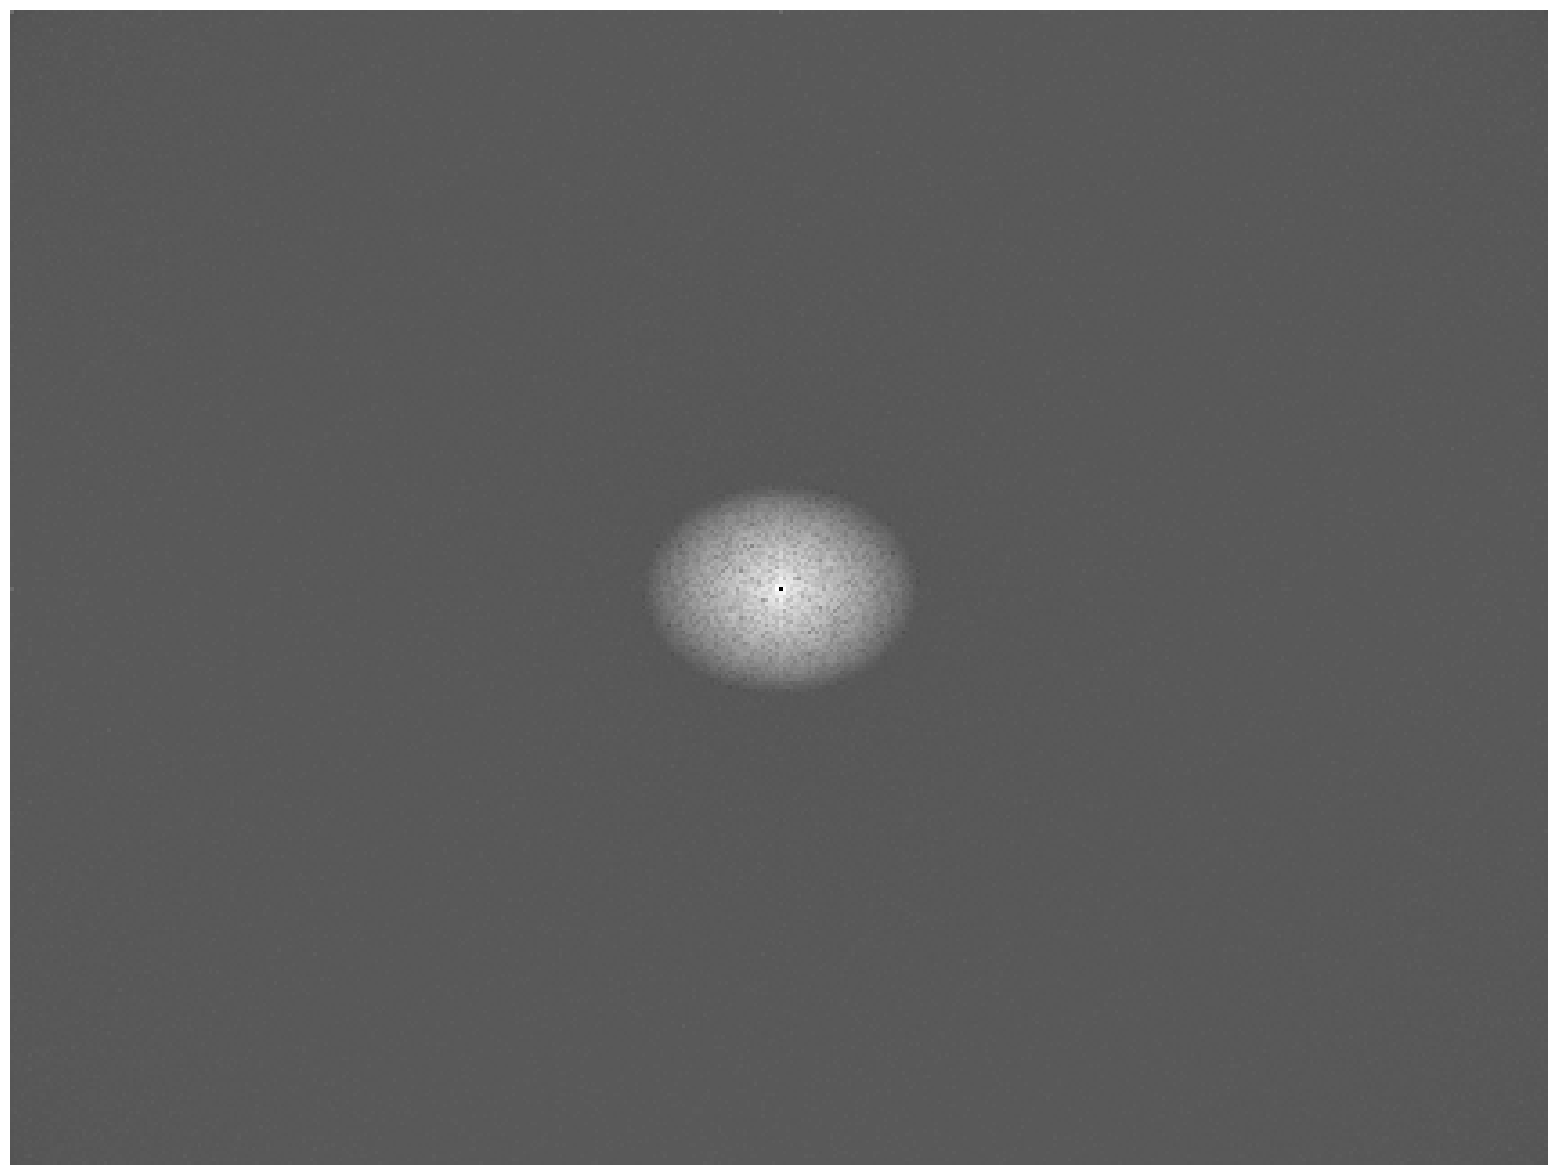

In [62]:
#Y
pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(Y11), pylab.axis('off')
pylab.show()

<ipython-input-56-eec81d333b63>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
<ipython-input-56-eec81d333b63>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
<ipython-input-56-eec81d333b63>:33: ComplexWarning: Casting complex values to real discards the imaginary part
  Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
<ipython-input-56-eec81d333b63>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
<ipython-input-56-eec81d333b63>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
<ipython-input-56-eec81d333b63>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  Y11 = cv2.multiply(ma

(Text(0.5, 1.0, 'g11'), (-0.5, 425.5, 319.5, -0.5))

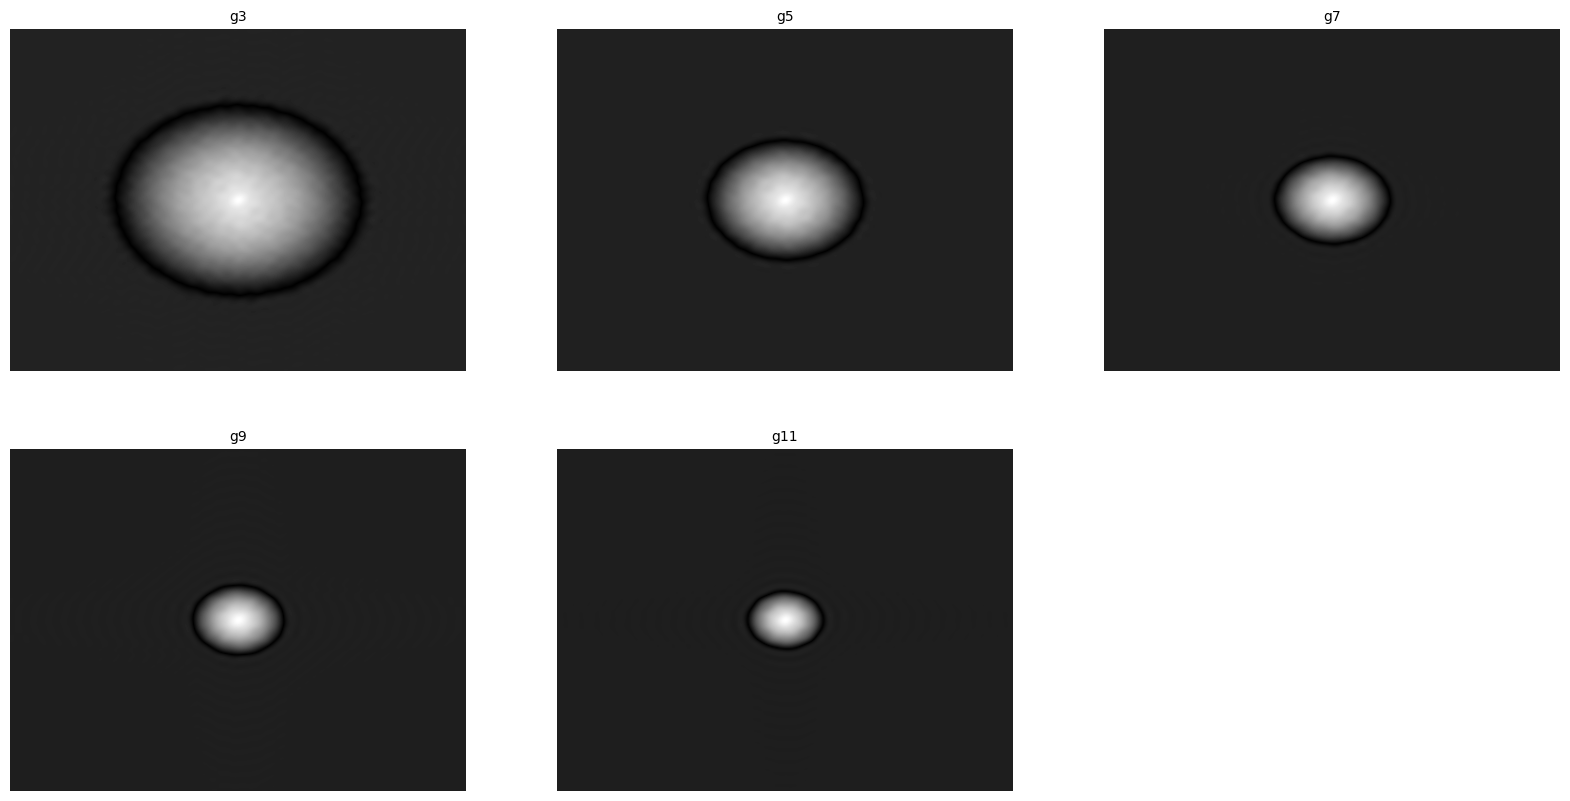

In [56]:
def dft_reverse(img):
  #영상을 이산푸리에 변환
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  
  #DFT 변환
  dft_shift = np.fft.fftshift(dft)

  #역푸리에
  
  #DC 성분 중심으로 이동
  rows, cols = img.shape
  crow,ccol = int(rows/2), int(cols/2)
  #첫번째 마스크 만들기
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-30:crow+30, ccol-30:ccol+30] = 1

  #마스크를 이용하여 inverse DFT취하기
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  #cv2.idft를 이용하여 이산푸리에 역변환
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  return img_back
  

pylab.figure(figsize=(20, 10)),pylab.gray()

Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
pylab.subplot (2, 3, 1), pylab.imshow(dft_reverse(image3))
pylab.title('g3', size=10), pylab.axis('off')

Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
pylab.subplot (2, 3, 2), pylab.imshow(dft_reverse(image5))
pylab.title('g5', size=10), pylab.axis('off')

Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
pylab.subplot (2, 3, 3), pylab.imshow(dft_reverse(image7))
pylab.title('g7', size=10), pylab.axis('off')

Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
pylab.subplot (2, 3, 4), pylab.imshow(dft_reverse(image9))
pylab.title('g9', size=10), pylab.axis('off')

Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))
pylab.subplot (2, 3, 5), pylab.imshow(dft_reverse(image11))
pylab.title('g11', size=10), pylab.axis('off')

<ipython-input-39-eec81d333b63>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)


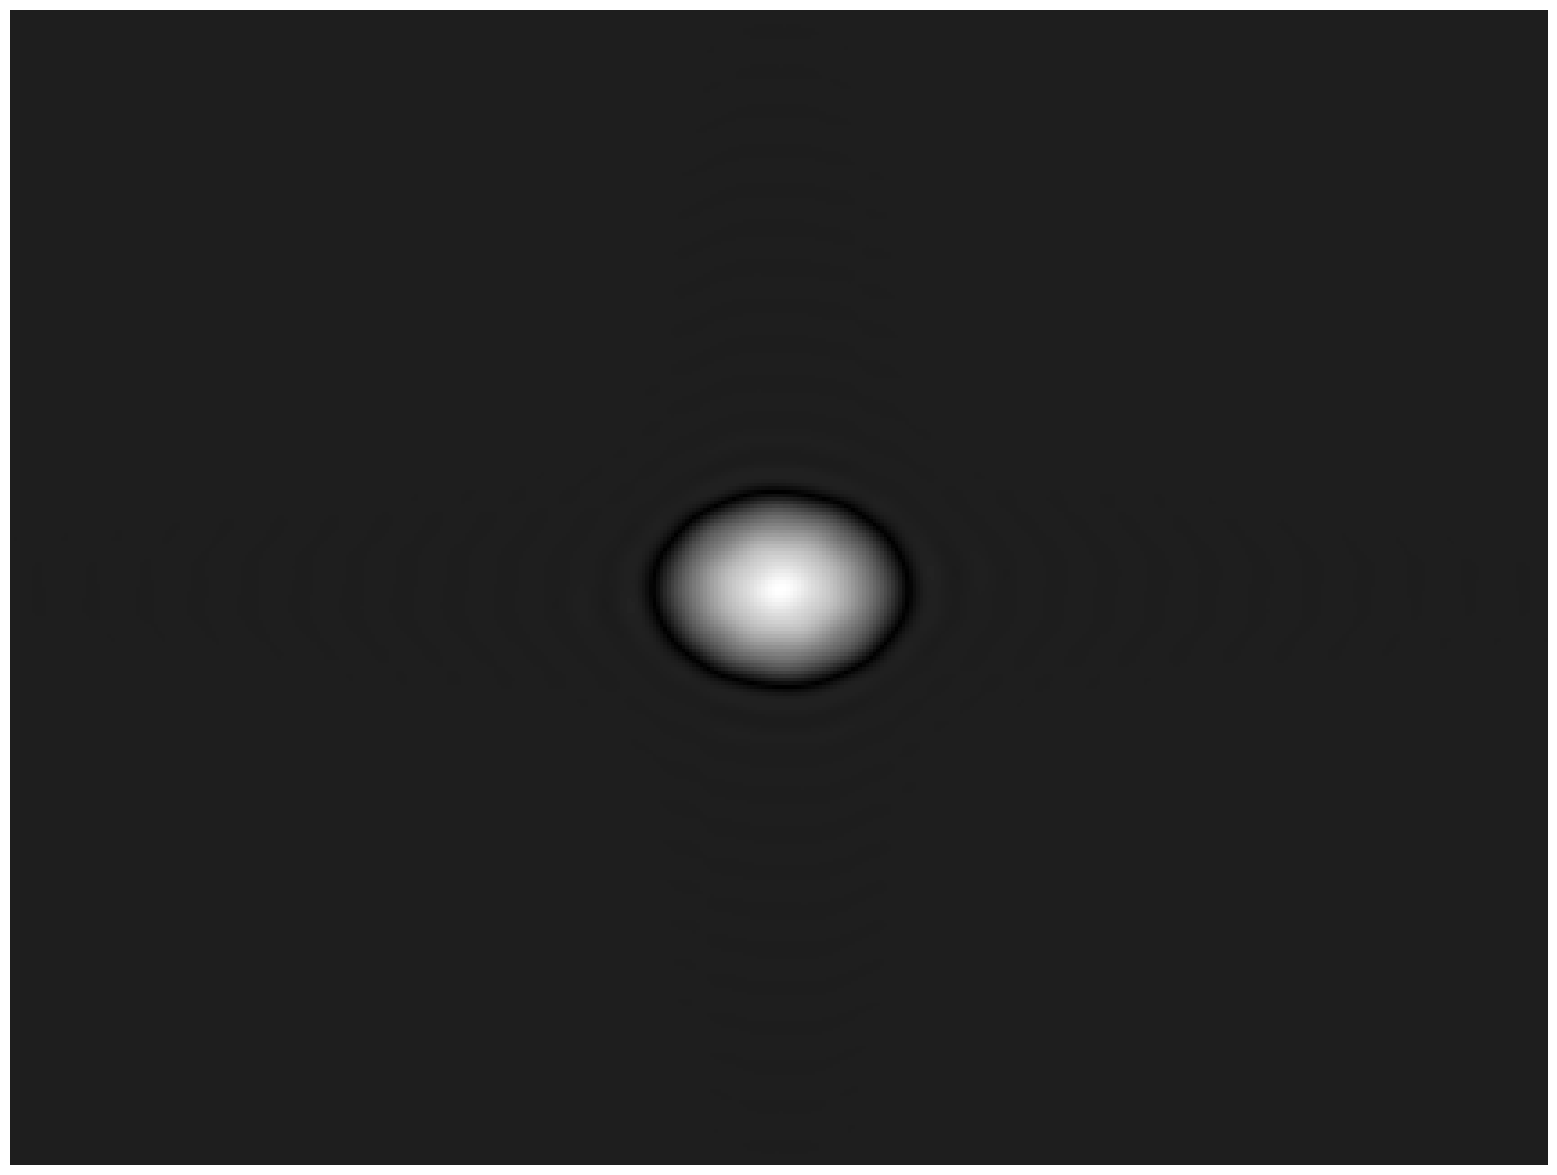

In [44]:
pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(dft_reverse(image11)), pylab.axis('off')
pylab.show()

<ipython-input-56-eec81d333b63>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)


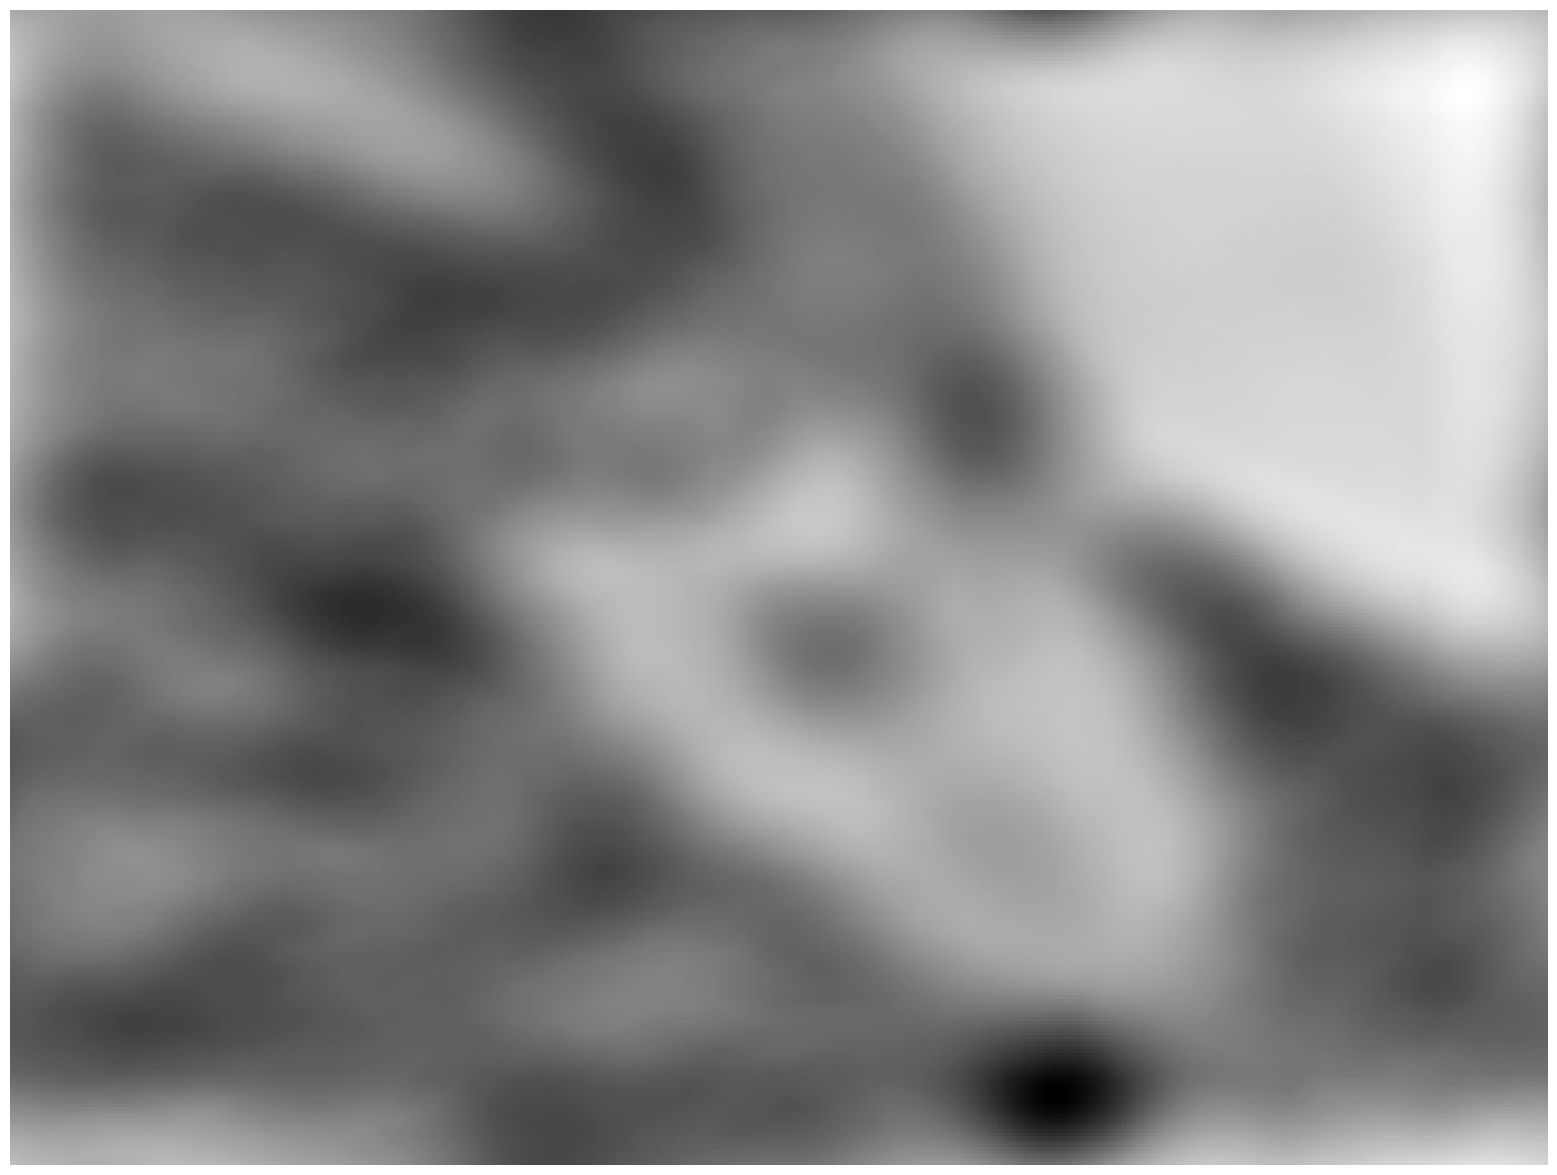

In [70]:
#x와 g들의 컨볼루션 연산 = y
x = img
dst = cv2.filter2D(dft_reverse(image11), -1, x)
pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(dst), pylab.axis('off')
pylab.show()

<ipython-input-89-98db99cc3c83>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
<ipython-input-56-eec81d333b63>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
<ipython-input-89-98db99cc3c83>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
<ipython-input-89-98db99cc3c83>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
<ipython-input-89-98db99cc3c83>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
<ipython-input-89-98db99cc3c83>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  Y11 = cv2.multiply(mag

(Text(0.5, 1.0, 'y11'), (-0.5, 425.5, 319.5, -0.5))

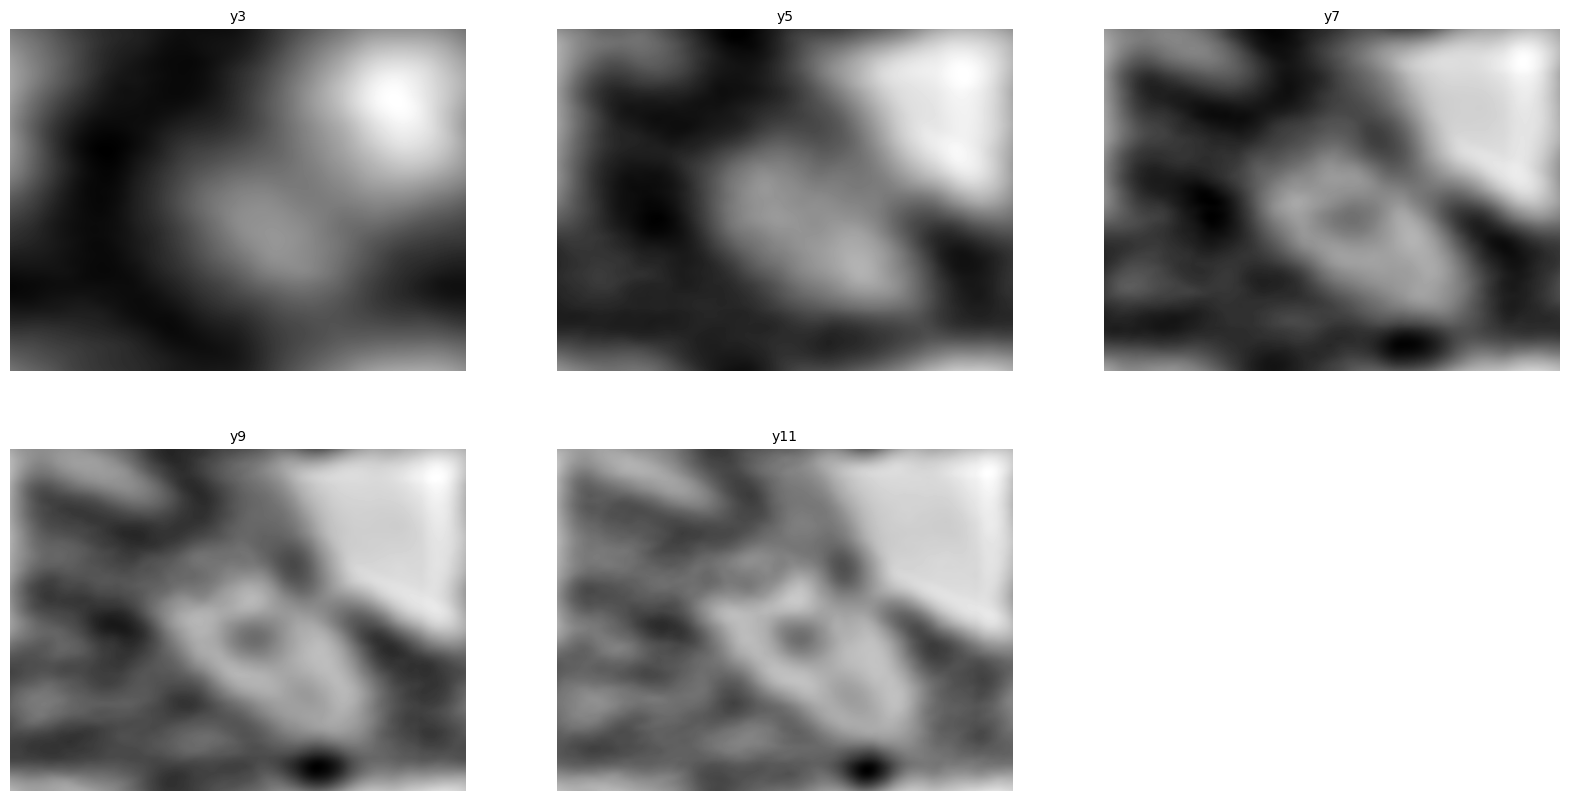

In [89]:
# y 계산
def x_g_convolution(image) :
  x = img
  dst = cv2.filter2D(dft_reverse(image), -1, x)
  return dst

pylab.figure(figsize=(20, 10)),pylab.gray()

Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
pylab.subplot (2, 3, 1), pylab.imshow(x_g_convolution(image3))
pylab.title('y3', size=10), pylab.axis('off')

Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
pylab.subplot (2, 3, 2), pylab.imshow(x_g_convolution(image5))
pylab.title('y5', size=10), pylab.axis('off')

Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
pylab.subplot (2, 3, 3), pylab.imshow(x_g_convolution(image7))
pylab.title('y7', size=10), pylab.axis('off')

Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
pylab.subplot (2, 3, 4), pylab.imshow(x_g_convolution(image9))
pylab.title('y9', size=10), pylab.axis('off')

Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))
pylab.subplot (2, 3, 5), pylab.imshow(x_g_convolution(image11))
pylab.title('y11', size=10), pylab.axis('off')

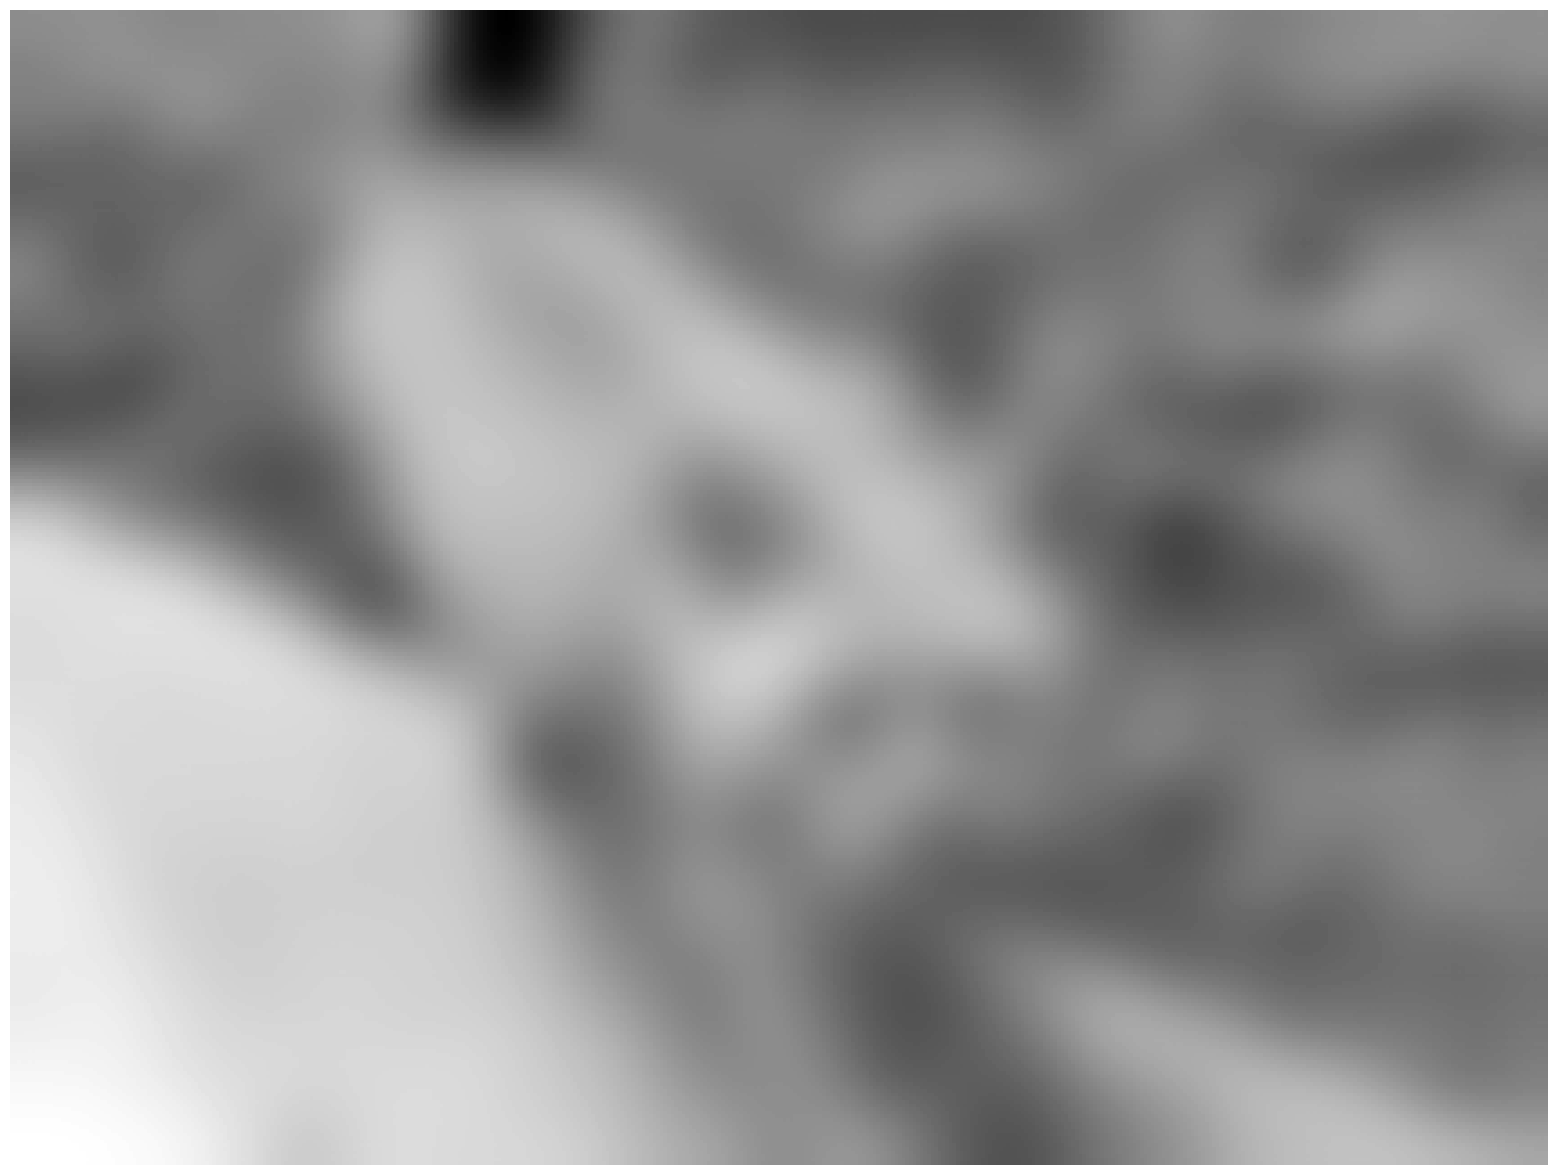

In [80]:
gau = cv2.GaussianBlur(img, (0,0), 11)
pylab.figure(figsize=(20,15)),pylab.gray()
pylab.plot(),pylab.imshow(gau), pylab.axis('off')
pylab.show()

<ipython-input-91-6b6082aa895f>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
<ipython-input-91-6b6082aa895f>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
<ipython-input-91-6b6082aa895f>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
<ipython-input-91-6b6082aa895f>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
<ipython-input-91-6b6082aa895f>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))


(Text(0.5, 1.0, 'w11'), (-0.5, 425.5, 319.5, -0.5))

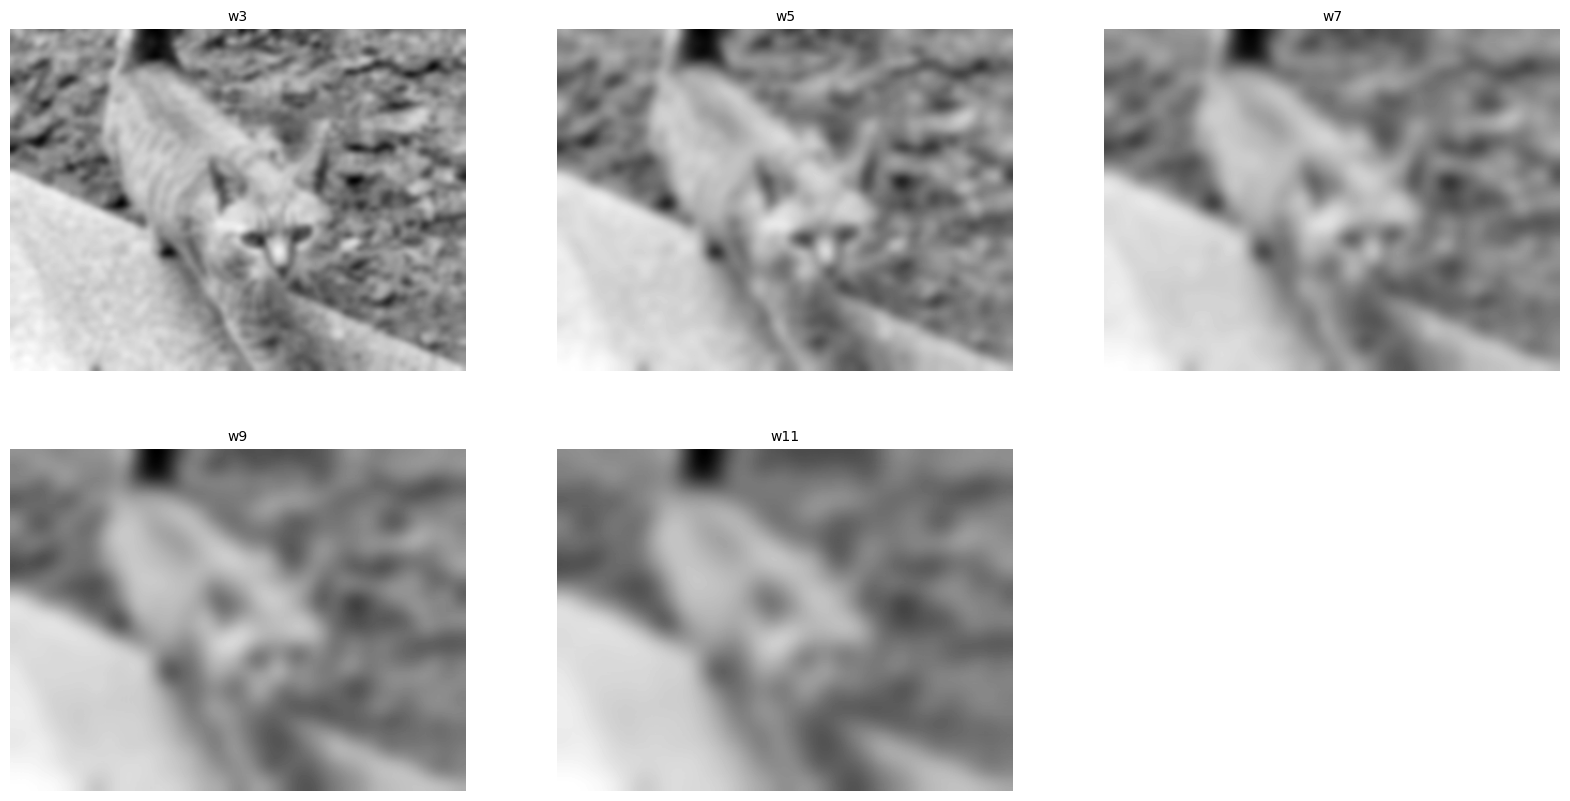

In [91]:
pylab.figure(figsize=(20, 10)),pylab.gray()

Y3 = cv2.multiply(mag_dft_shift, image3.astype(np.float32))
pylab.subplot (2, 3, 1), pylab.imshow(cv2.GaussianBlur(img, (0,0), 3))
pylab.title('w3', size=10), pylab.axis('off')

Y5 = cv2.multiply(mag_dft_shift, image5.astype(np.float32))
pylab.subplot (2, 3, 2), pylab.imshow(cv2.GaussianBlur(img, (0,0), 5))
pylab.title('w5', size=10), pylab.axis('off')

Y7 = cv2.multiply(mag_dft_shift, image7.astype(np.float32))
pylab.subplot (2, 3, 3), pylab.imshow(cv2.GaussianBlur(img, (0,0), 7))
pylab.title('w7', size=10), pylab.axis('off')

Y9 = cv2.multiply(mag_dft_shift, image9.astype(np.float32))
pylab.subplot (2, 3, 4), pylab.imshow(cv2.GaussianBlur(img, (0,0), 9))
pylab.title('w9', size=10), pylab.axis('off')

Y11 = cv2.multiply(mag_dft_shift, image11.astype(np.float32))
pylab.subplot (2, 3, 5), pylab.imshow(cv2.GaussianBlur(img, (0,0), 11))
pylab.title('w11', size=10), pylab.axis('off')